# Разведочный анализ данных (exploratory data analysis, EDA)

# Подготовка

### Импорты

In [1]:
import pandas as pd
import numpy as np

In [2]:
import json

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
import re

### Опции

In [6]:
pd.set_option('display.float_format', '{:,.2f}'.format)
# разделитель ',' и два знака после запятой у чисел с плавающей точкой

In [ ]:
# Сброс ограничений на количество выводимых рядов
pd.set_option('display.max_rows', None)

In [ ]:
# Сброс ограничений на число столбцов
pd.reset_option('display.max_columns')

In [ ]:
pd.set_option('display.max_colwidth', None)
# Установите для отображения самой большой линии

In [ ]:
pd.reset_option('display.max_colwidth')
# Сброс ограничений на количество символов в записи

#### опции для графики

In [7]:
large = 16; med = 12; small = 10
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (12, 8),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}

plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')

In [8]:
sns.set_palette('deep') 
sns.set_style("whitegrid")

## Заливка данных

In [ ]:
# полный датафрейм со всеми столбцами
# full_df = pd.read_csv('region_roles_26.05.22_CSV.csv', encoding='windows-1251', sep=';')

#### Что в столбцах?

In [ ]:
df.premium.value_counts()
# удалить

In [ ]:
df.name.value_counts()

In [ ]:
df.department.value_counts()
# delete

In [ ]:
df.has_test.value_counts()
# delete

In [ ]:
df.response_letter_required.value_counts()
# delete

In [ ]:
df.area.value_counts()
# delete

In [ ]:
df.salary.value_counts()

In [ ]:
df.type.value_counts()
# delete

In [ ]:
df.address.value_counts()
# delete

In [ ]:
df.response_url.value_counts()
# delete

In [ ]:
df.sort_point_distance.value_counts()
# delete

In [ ]:
df.archived.value_counts()
# delete

In [ ]:
df.insider_interview.value_counts()
# delete

In [ ]:
df.url.value_counts()
# delete

In [ ]:
df.alternate_url.value_counts()
# delete

In [ ]:
df.relations.value_counts()
# delete

In [ ]:
df.employer.value_counts()
# delete

In [ ]:
df.snippet.value_counts()
# delete не нужен для целей исследования

In [ ]:
df.contacts.value_counts()
# delete

In [ ]:
df.schedule.value_counts()


In [ ]:
df.working_days.value_counts()
# delete

In [ ]:
df.working_time_intervals.value_counts()
# delete

In [ ]:
df.working_time_modes.value_counts()
# delete

In [ ]:
df.accept_temporary.value_counts()
# delete

In [ ]:
df.experience.value_counts()

In [ ]:
df.region.value_counts()

In [ ]:
df.immediate_redirect_url.value_counts()
# delete

#### Cокращенный dataframe

In [9]:
list_columns = [
    'id',
    'name',
    'salary',
    'experience',
    'schedule',
    'key_skills',
    'specializations',
    'region'
]

In [10]:
# dataframe после анализа содержимого столбцов
df = pd.read_csv('region_roles_26.05.22_CSV.csv', usecols=list_columns, encoding='windows-1251', sep=';')

5,7s

# EDA (3 этапа)

## 1. Первичный анализ датасета

- Знакомимся с таблицей данных
- Оцениваем ее объем
- Оцениваем признаки объектов, хранящихся в ней
- Выявляем наличие пропусков

### общая информация

In [11]:
df.head(2)

,id,name,salary,schedule,experience,key_skills,specializations,region
0,50632962,Консультант по информационной безопасности,NaN,"{'id': 'fullDay', 'name': 'Полный день'}","{'id': 'between1And3', 'name': 'От 1 года до 3...","[{'name': 'Информационная безопасность'}, {'na...","[{'id': '1.110', 'name': 'Компьютерная безопас...",Москва
1,49062175,Product Manager (Разработка ПО в сфере Информа...,NaN,"{'id': 'fullDay', 'name': 'Полный день'}","{'id': 'between3And6', 'name': 'От 3 до 6 лет'}","[{'name': 'Информационная безопасность'}, {'na...","[{'id': '1.110', 'name': 'Компьютерная безопас...",Москва


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69656 entries, 0 to 69655
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               69656 non-null  int64 
 1   name             69656 non-null  object
 2   salary           37590 non-null  object
 3   schedule         69656 non-null  object
 4   experience       69656 non-null  object
 5   key_skills       69656 non-null  object
 6   specializations  69656 non-null  object
 7   region           69656 non-null  object
dtypes: int64(1), object(7)
memory usage: 4.3+ MB


In [13]:
df.shape

(69656, 8)

In [14]:
df.isna().sum()
# поиск пропущенных значений

id                     0
name                   0
salary             32066
schedule               0
experience             0
key_skills             0
specializations        0
region                 0
dtype: int64

In [15]:
# список столбцов в виде list()
df.columns.tolist()

['id',
 'name',
 'salary',
 'schedule',
 'experience',
 'key_skills',
 'specializations',
 'region']

### Есть дубликаты?

In [8]:
df.duplicated().sum()

233

In [ ]:
df[df.duplicated() == True]

удаляем дубликаты

In [11]:
df = df.drop_duplicates()

### Преобразовываем строку JSON

json.loads
Считывание строки в формате JSON в объект Python

json.dumps
Преобразование объекта в строку в формате JSON. Функция dumps() модуля json сериализирует объект Python obj в строку str формата JSON. Сериализация объектов Python выполняется согласно таблице преобразования

In [12]:
# Преобразование json с dumps
def text_to_json_dumps(text):
    text = text.replace("'", '"')
    try:
        return json.loads(json.dumps(text))
    except:
        print('error')

In [10]:
# Преобразование json с заменой подстроки
def text_to_json_str(text):
    try:
        return json.loads(text.replace('"', '').replace("'", '"'))
    except:
        print('error')
        # return []

### Очищаем dataframe от данных, не относящихся к IT

In [82]:
# для упрощения обработки приводим строки к нижнему регистру
df['name'] = df['name'].str.lower()

Работаем со столбцом specializations, чтобы очистить dataframe от данных, не относящихся к IT, что позволит точнее провести описательную статистику

In [19]:
df.specializations[0]

"[{'id': '1.110', 'name': 'Компьютерная безопасность', 'profarea_id': '1', 'profarea_name': 'Информационные технологии, интернет, телеком'}, {'id': '1.113', 'name': 'Консалтинг, Аутсорсинг', 'profarea_id': '1', 'profarea_name': 'Информационные технологии, интернет, телеком'}]"

Преобразуем данные json и сохраним их в столбце specializations_jsn

In [13]:
df['specializations_jsn'] = df['specializations'].apply(text_to_json_dumps)

Создаем функцию, вытаскивающую тег 'profarea_id'. Это Идентификатор профессиональной области, в которую входит специализация. 1 - Информационные технологии, интернет, телеком

In [14]:
def get_tag_profarea_id(text):
    text = json.loads(text)
    try:
        out = []
        if len(text) > 0:
            for i in text:
                out.append(i['profarea_id'])
            return out
    except:
        print('error')


Создаем новый столбец 'profarea_id'

In [15]:
df['profarea_id'] = df.specializations_jsn.apply(get_tag_profarea_id)

Создаем функцию поиска элемента '1' в списке для того, чтобы сепарировать строки dataframe со специализацией 1 - Информационные технологии, интернет, телеком

In [16]:
def find_1(lst):
    return '1' in lst

Создаем столбец 'profarea_id_1'

In [17]:
df['profarea_id_1'] = df['profarea_id'].apply(find_1)

Разделяем dataframe по признаку отношения специализации к IT

In [18]:
it_true = df[df['profarea_id_1'] == 1]

In [19]:
it_false = df[df['profarea_id_1'] == 0]

В результате мы видим, что значительная часть строк не содержит идентификатор информационных технологий. Оставляем пока строки True и дополнительно разбираемся со строками False 

#### Разбираемся с it_false - есть ли там it-специальности

In [ ]:
df.head(2)

In [22]:
df.name[:3]

0           консультант по информационной безопасности
1    product manager (разработка по в сфере информа...
2               эксперт по компьютерной криминалистике
Name: name, dtype: object

Создаем список подстрок, не относящихся к IT-специализации

In [23]:
lst_not_it = [
    'дизай',
    'недви',
    'персон', 
    'кадр',
    'рекру',
    'hr',
    'продаж',
    'риэл',
    'риел',
    'контент',
    'зал',
    'артист',
    'smm',
    'инструкт',
    'тренер',
    'креатив',
    'ретуш',
    'аренд',
    'псих',
    'табел',
    'лаборат',
    'автор',
    'смет',
    'менеджер по работе с клиентами',
    'компенсац',
    'обуч',
    'помещен',
    'межев',
    'ипоте',
    'маркетол',
    'начинающий специалист',
    'блогер',
    'кдп',
    'recruiter',
    'труд',
    'специалист по работе с клиентами',
    'штат',
    'продавец',
    'офис',
    'брокер',
    'смм',
    'ресеч',
    'торг',
    'менедж',
    'воин',
    'новострой',
    'pr',
    'маркетинг',
    'реклам',
    'арт',
    'агент',
    'строи',
    'энергет',
    'табель',
    'плав',
    'интерьер'
    ]


Сепарируем столбец 'name' на 2 dataframe: 1) с наименованиями из списка 2) остальное

In [24]:
pat = '|'.join(lst_not_it)
temp_df = it_false[it_false['name'].str.contains(pat)]
it_not_false = it_false[~it_false.index.isin(temp_df.index)]

In [34]:
# Проверка количества строк
temp_df.shape[0] + it_not_false.shape[0]

19221

In [32]:
it_false.shape

(19221, 11)

In [35]:
it_not_false.shape

(3990, 11)

#### объединяем очищенные dataframe

In [25]:
df = pd.concat([it_true, it_not_false], ignore_index=True)

In [26]:
df.shape

(54192, 11)

Еще раз чистим объединенный dataframe по списку с однозначно не it-специальностями (менеджер, дизайн, арт, начинающий специалист исключены из списка)

In [104]:
lst_not_it_2 = [
    'недви',
    'персон', 
    'кадр',
    'рекру',
    'hr',
    'продаж',
    'риэл',
    'риел',
    'контент',
    'зал',
    'артист',
    'smm',
    'инструкт',
    'тренер',
    'ретуш',
    'аренд',
    'псих',
    'табел',
    'смет',
    'менеджер по работе с клиентами',
    'компенсац',
    'обуч',
    'помещен',
    'межев',
    'ипоте',
    'блогер',
    'кдп',
    'recruiter',
    'труд',
    'специалист по работе с клиентами',
    'штат',
    'продавец',
    'брокер',
    'смм',
    'ресеч',
    'торг',
    'воин',
    'новострой',
    'pr',
    'маркетинг',
    'реклам',
    'агент',
    'строи',
    'энергет',
    'плаван',
    'табель',
    'интерьер'
    ]

In [105]:
pat = '|'.join(lst_not_it)
temp_df = df[df['name'].str.contains(pat)]
df = df[~df.index.isin(temp_df.index)]

In [29]:
df.shape

(50202, 11)

## 2. Анализ и визуализация отдельных колонок

Пытаемся сформулировать вопросы для колонок и ответить на них, используя
- описательная статистика
- выбросы, аномалии
- сортировка
- визуализация

### Работаем со столбцом salary

🎯 Цель: получить столбец **'salary_from_ru'**.<br>
Надо вытащить данные по salary from и привести все данные к рублевому эквиваленту. Сделать описательную статистику, визуализацию, посмотреть выбросы, аномалии.

In [38]:
df.salary[3]

"{'from': 26000, 'to': None, 'currency': 'RUR', 'gross': True}"

вытаскиваем тег from из salary

In [30]:
# добавляем обработку None
def salary_from(salary):
    if pd.isna(salary): 
        clean_salary = np.nan
    else:
        clean_salary = salary.replace("{", '').replace("}", '').split(',')[0][8:]
        if clean_salary == 'None':
            clean_salary = np.nan

    return clean_salary

вытаскиваем тег currency из salary

In [31]:
# добавляем обработку None
def salary_currency(salary):
    if pd.isna(salary): 
        clean_salary = np.nan
    else:
        clean_salary = salary.replace("{", '').replace("}", '').split(',')[2][12:]
        if clean_salary == 'None':
            clean_salary = np.nan

    return clean_salary

In [32]:
df['salary_currency'] = df.salary.apply(salary_currency)

In [33]:
df['salary_from'] = df.salary.apply(salary_from)

In [34]:
df['salary_from'] = pd.to_numeric(df['salary_from'])

приводим все salary_from в рубли

In [35]:
def get_rate(currency):
    rur =  1
    doll = 70
    eur = 75
    kzt = 0.13
    if currency is np.nan:
        return np.nan
    else:
        if currency.find('RUR') >= 0:
            return rur
        elif currency.find('USD') >= 0:
            return doll
        elif currency.find('EUR') >= 0:
            return eur
        elif currency.find('KZT') >= 0:
            return kzt

In [36]:
df['salary_temp'] = df.salary_from * df.salary_currency.apply(get_rate)

проверка

In [37]:
df[['salary_from', 'salary_currency', 'salary_temp']].sort_values('salary_currency', ascending=False)[:5]

,salary_from,salary_currency,salary_temp
15599,"4,000.00",'USD',"280,000.00"
20326,"4,000.00",'USD',"280,000.00"
31501,"4,000.00",'USD',"280,000.00"
16136,"5,000.00",'USD',"350,000.00"
18879,800.00,'USD',"56,000.00"


Выбираем на что менять NaN в столбце 'salary_ru'

In [38]:
(
    df.salary_temp.mean(),
    df.salary_temp.median(),
    df.salary_temp.min(),
    df.salary_temp.max()
)

(82961.7682277935, 60000.0, 20.0, 1500000.0)

Медиана меньше зависима от выбросов и лучше подходит для заполнения ячеек NaN

In [39]:
agg_func_math_ = {
    'salary_temp': ['median']
}
# задаем список функций по определенному столбцу с расчетными данными

region_salary_ru = df.groupby('region', dropna=True).agg(agg_func_math_).round(2).fillna(0)
# включаем строки с NaN при расчете: dropna=False

переименовываем столбец

In [40]:
region_salary_ru.columns = ['_'.join(col).strip() for col in region_salary_ru.columns.values]

Заджойним region_salary_ru в df

In [41]:
df = df.merge(region_salary_ru, on='region', how='inner')

In [42]:
df.salary_temp.isna().sum()

29341

Так как медианные зарплаты различаются по регионам. Будем ячейки NaN в колонке 'salary_ru' заменять на медианную зарплату с учетом региона

In [41]:
df.loc[(df.salary_temp.isna()), 'salary_temp'] = df.salary_temp_median

переименуем столбец

In [43]:
df = df.rename(columns={'salary_temp_median': 'salary_from_ru'})

In [44]:
df.salary_from_ru.isna().sum()

0

In [44]:
df.salary_from_ru.median()

60000.0

<function matplotlib.pyplot.show(close=None, block=None)>

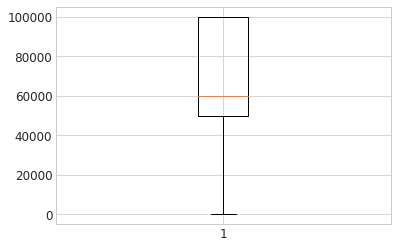

In [45]:
plt.boxplot(df.salary_from_ru)
plt.show

диапазон зарплат

In [46]:
df['band_salary'] = 0
df['salary_category'] = 0
for i in range(len(df.salary_from_ru)):
    if df.salary_from_ru[i] > 0 and df.salary_from_ru[i] < 60000:
        df['band_salary'][i] = 'до 60 т.р.'
        df['salary_category'][i] = 1
    elif df.salary_from_ru[i] >= 60000 and df.salary_from_ru[i] < 80000:
        df['band_salary'][i] = 'от 60 до 80 т.р.'
        df['salary_category'][i] = 2
    elif df.salary_from_ru[i] >= 80000 and df.salary_from_ru[i] < 100000:
        df['band_salary'][i] = 'от 80 до 100 т.р.'
        df['salary_category'][i] = 3
    elif df.salary_from_ru[i] >= 100000:
        df['band_salary'][i] = 'от 100 т.р.'
        df['salary_category'][i] = 4
    else:
        df['band_salary'][i] = 'no data'

/tmp/ipykernel_1686/779826173.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['band_salary'][i] = 'от 100 т.р.'
/tmp/ipykernel_1686/779826173.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['salary_category'][i] = 4
/tmp/ipykernel_1686/779826173.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['salary_category'][i] = 1
/tmp/ipykernel_1686/779826173.py:9: SettingWithCopyWarning: 
A value is trying to be set on a co

In [47]:
df.band_salary.value_counts().reset_index()

,index,band_salary
0,до 60 т.р.,20605
1,от 100 т.р.,15069
2,от 60 до 80 т.р.,8117
3,от 80 до 100 т.р.,6407
4,no data,4


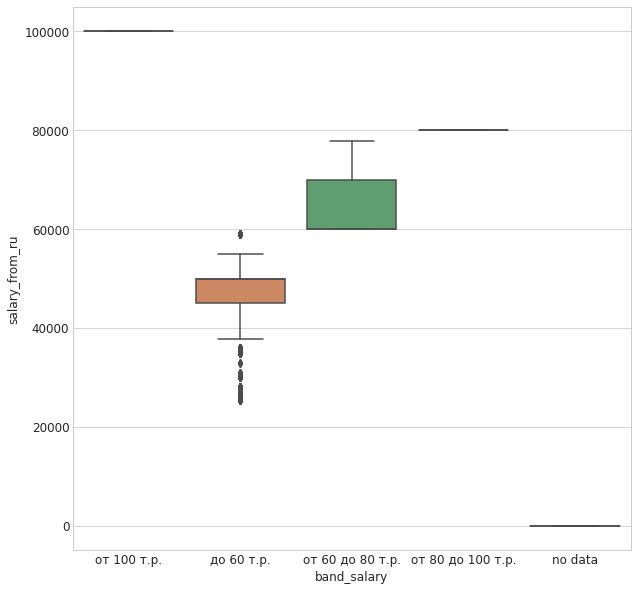

In [48]:
f, ax = plt.subplots(figsize=(10, 10))
fig = sns.boxplot(x='band_salary', y='salary_from_ru', data=df)

<function matplotlib.pyplot.show(close=None, block=None)>

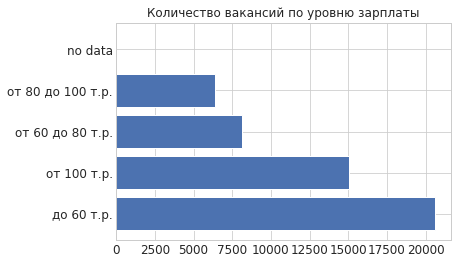

In [49]:
plt.barh(
    df.band_salary.value_counts().index,
    df.band_salary.value_counts().values
)
plt.title('Количество вакансий по уровню зарплаты')
plt.show

### Анализируем количество и частоту специализаций

🎯 Цель: создать таблицу **'specializations_frequency'**. <br>
Надо проанализировать данные по тегу 'name'. 

#### Агрегируем данные по тегу name колонки 'specializations'

In [51]:
df.specializations[0]

"[{'id': '1.110', 'name': 'Компьютерная безопасность', 'profarea_id': '1', 'profarea_name': 'Информационные технологии, интернет, телеком'}, {'id': '1.113', 'name': 'Консалтинг, Аутсорсинг', 'profarea_id': '1', 'profarea_name': 'Информационные технологии, интернет, телеком'}]"

пишем функцию для получения тега 'name'

In [50]:
def get_tag_name(jsn):
    text = json.loads(jsn)
    try:
        out = []
        if len(text) > 0:
            for i in text:
                out.append(i['name'])
            return out
    except:
        print('error')

создаем столбец 'specializations_name', вытаскиваем тег 'name' из колонки 'specializations'

In [52]:
df['specializations_name'] = df.specializations_jsn.apply(get_tag_name)

In [53]:
specializations_region = df[['specializations_name', 'region']].explode('specializations_name')

удаляем строки, не относящиеся к IT-специализации

In [54]:
specializations_region['specializations_name'] = specializations_region['specializations_name'].str.lower()

Сепарируем столбец 'specializations_name': 1) с наименованиями из списка 'lst_not_it' 2) остальное

In [55]:
pat = '|'.join(lst_not_it)
temp_ = specializations_region[specializations_region['specializations_name'].str.contains(pat)]
it_sp = specializations_region[~specializations_region.index.isin(temp_.index)]

In [56]:
temp_.shape

(15030, 2)

In [57]:
it_sp.shape

(189799, 2)

In [58]:
specialization_frequency = (it_sp
                .specializations_name
                .value_counts()
                .reset_index()
)

Переименуем столбцы

In [59]:
specialization_frequency = specialization_frequency.rename(columns={'index': 'specialization', 'specializations_name': 'frequency'})

In [60]:
specialization_frequency[:3]

,specialization,frequency
0,инженер,31385
1,"программирование, разработка",20504
2,системы управления предприятием (erp),17332


Специализация с частотой больше 500

In [61]:
specialization_frequency[specialization_frequency.frequency > 500]

,specialization,frequency
0,инженер,31385
1,"программирование, разработка",20504
2,системы управления предприятием (erp),17332
3,"поддержка, helpdesk",14615
4,системный администратор,14540
5,web инженер,14157
6,web мастер,14129
7,интернет,11784
8,аналитик,10740
9,другое,10626


<function matplotlib.pyplot.show(close=None, block=None)>

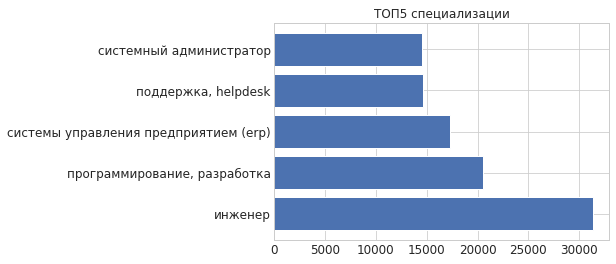

In [63]:
plt.barh(
    specialization_frequency[specialization_frequency.frequency > 14500].specialization.values,
    specialization_frequency[specialization_frequency.frequency > 14500].frequency.values
)
plt.title('ТОП5 специализации')
plt.show

### Анализируем количество и частоту навыков

🎯 Цель: создать таблицу **'skills_frequency'**. <br>
Надо проанализировать данные по тегу 'name'. 

#### Агрегируем по тегу name колонки 'key_skills'

In [76]:
df.key_skills.iloc[1]

"[{'name': 'Информационная безопасность'}, {'name': 'Запуск новых продуктов'}, {'name': 'Анализ рынка'}, {'name': 'Бизнес-анализ'}, {'name': 'Управление продуктом'}, {'name': 'Маркетинговое планирование'}]"

Заменяем вложенные двойные кавычки на символ '|'. это позволит не ловить ошибку и при этом не затрудняет чтение и анализ данных

In [64]:
def text_replace(text):
    return text.replace('"', '|').replace("'", '"')



In [65]:
df['key_skills_jsn'] = df.key_skills.apply(text_replace).apply(text_to_json_dumps)

создаем новый столбец key_skills_name

In [66]:
def get_tag_name_(text):
    try:
        text = json.loads(text)
        out = []
        if len(text) > 2:
            for i in text:
                out.append(i['name'])
            return out
    except:
        return []

In [67]:
df['key_skills_name'] = df.key_skills_jsn.apply(get_tag_name_)

In [68]:
df['key_skills_name'].isna().sum()

10946

None заменяем на 'нет информации'

In [69]:
df['key_skills_name'] = df['key_skills_name'].fillna('нет информации')

создаем таблицу из столбцов 'key_skills_name', 'salary_ru'

In [70]:
skill_salary = df[['key_skills_name', 'salary_from_ru']].explode('key_skills_name')

In [71]:
skill_salary[:3]

,key_skills_name,salary_from_ru
0,Информационная безопасность,"100,000.00"
0,Аудит информационной безопасности,"100,000.00"
0,ФЗ-152,"100,000.00"


подсчитываем частоту key_skills_name в таблице skills_frequency

In [72]:
skills_frequency = (skill_salary
                .key_skills_name
                .value_counts()
                .reset_index()
)

In [73]:
skills_frequency = skills_frequency.rename(columns={'index': 'skills', 'key_skills_name': 'frequency'})

In [74]:
skills_frequency[:3]

,skills,frequency
0,нет информации,10946
1,SQL,6062
2,Linux,4757


In [ ]:
skills_frequency[skills_frequency['frequency'] > 1000]

### Анализируем вакансии в столбце 'name'

Смотрим группировку вакансий по наименованию

Посмотрим ТОП вакансий по столбцу name

In [75]:
df.name.value_counts().loc[lambda x: x>200].reset_index()

,index,name
0,Системный администратор,1652
1,Программист 1С,1122
2,Специалист технической поддержки,481
3,Системный аналитик,465
4,Аналитик,346
5,Инженер-программист,330
6,Программист 1C,325
7,Инженер технической поддержки,273
8,Бизнес-аналитик,272
9,Дизайнер,259


Посмотрим количество сгруппированных вакансий

In [76]:
df.name.value_counts().loc[lambda x: x>1].sum()

30817

19 тыс. вакансий не сгруппировалось

In [77]:
df.name.value_counts().loc[lambda x: x==1].sum()

19385

объединяем наименования вакансий по ключевым словам

In [116]:
def agg_name(text):
    if re.search(r'1с|1c|1 c|1 с', text) is not None:
        text = '1c'
    elif re.search(r'qa|tester|тестер|тестир', text) is not None:
        text = 'qa'
    elif re.search(r'c\+\+|с\+\+|c#|с#', text) is not None:
        text = 'c c+ c#'
    elif re.search(r'sql|postgresql', text) is not None:
        text = 'sql'
    elif re.search(r'java', text) is not None:
        text = 'java'
    elif re.search(r'js|javascript', text) is not None:
        text = 'javascript'
    elif re.search(r'python|питон', text) is not None:
        text = 'python'
    elif re.search(r'devops', text) is not None:
        text = 'devops'
    elif re.search(r'\.net', text) is not None:
        text = '.net'
    elif re.search(r'android', text) is not None:
        text = 'android'
    elif re.search(r'yandex|яндекс|яndex', text) is not None:
        text = 'yandex'
    elif re.search(r'поддерж|support|эксплуат|сервис', text) is not None:
        text = 'support'
    elif re.search(r'secur|безопасн|криминал|защит', text) is not None:
        text = 'security'
    elif re.search(r'data|данны|etl', text) is not None:
        text = 'data'
    elif re.search(r'web|веб|вэб', text) is not None:
        text = 'web'
    elif re.search(r'системный администратор', text) is not None:
        text = 'системный администратор'
    elif re.search(r'системный аналитик|system anal', text) is not None:
        text = 'системный аналитик'
    elif re.search(r'аналит', text) is not None:
        text = 'аналитик'
    elif re.search(r'prodact|product|продакт|продукт', text) is not None:
        text = 'product'
    elif re.search(r'2d|3d', text) is not None:
        text = '2d 3d'
    elif re.search(r'php', text) is not None:
        text = 'php'
    elif re.search(r'ios', text) is not None:
        text = 'ios'
    elif re.search(r'linux|unix', text) is not None:
        text = 'unix'
    elif re.search(r'fullstack|full stack', text) is not None:
        text = 'fullstack'
    elif re.search(r'front|фронт', text) is not None:
        text = 'frontend'
    elif re.search(r'back', text) is not None:
        text = 'backend'
    elif re.search(r'ui|ux', text) is not None:
        text = 'ui ux'
    elif re.search(r'sap', text) is not None:
        text = 'sap'
    elif re.search(r'erp', text) is not None:
        text = 'erp'
    elif re.search(r'bitrix|битрикс', text) is not None:
        text = 'bitrix'
    # else:
    #     text = 'other'
    return text

In [117]:
df['name_agg'] = df.name.apply(agg_name)

In [118]:
df_name_agg = df.name_agg.value_counts().reset_index()

In [119]:
df_name_agg

,index,name_agg
0,1c,4857
1,support,3943
2,qa,2770
3,системный администратор,2750
4,аналитик,2310
...,...,...
6906,ведущий специалист отдела автоматизированных с...,1
6907,инженер по внедрению itsm-системы,1
6908,senior research scientist,1
6909,руководитель проекта по цифровым подстанциям,1


In [100]:
df.name_agg.value_counts().loc[lambda x: x==1].sum()

0

### Работаем со столбцом 'experience'

In [78]:
df.experience[0]

"{'id': 'between1And3', 'name': 'От 1 года до 3 лет'}"

вытаскиваем тег name

In [79]:
# добавляем обработку None
def get_tag_experience_name(text):
    if pd.isna(text): 
        clean_text = np.nan
    else:
        clean_text = text.replace("{", '').replace("}", '').split(',')[1][8:]
        if clean_text == 'None':
            clean_text = np.nan

    return clean_text

In [80]:
df['experience_name'] = df.experience.apply(get_tag_experience_name)

In [81]:
df.experience_name

0         'От 1 года до 3 лет'
1              'От 3 до 6 лет'
2              'От 3 до 6 лет'
3                'Более 6 лет'
4              'От 3 до 6 лет'
                 ...          
54187     'От 1 года до 3 лет'
54188          'От 3 до 6 лет'
54189     'От 1 года до 3 лет'
54190     'От 1 года до 3 лет'
54191          'От 3 до 6 лет'
Name: experience_name, Length: 54192, dtype: object

In [82]:
df.experience_name.isna().sum()

0

In [83]:
df.experience_name.value_counts().reset_index()

,index,experience_name
0,'От 1 года до 3 лет',27988
1,'От 3 до 6 лет',17097
2,'Нет опыта',7333
3,'Более 6 лет',1774


<function matplotlib.pyplot.show(close=None, block=None)>

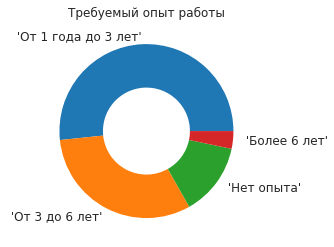

In [84]:
plt.pie(
    df.experience_name.value_counts().values,
    labels=df.experience_name.value_counts().index,
    wedgeprops=dict(width=0.5) # для бублика
    )
plt.title('Требуемый опыт работы')
plt.show

### Работаем со столбцом 'schedule'

In [85]:
df.schedule[0]

"{'id': 'fullDay', 'name': 'Полный день'}"

вытаскиваем тег name

In [97]:
# добавляем обработку None
def get_tag_schedule_name(text):
    if pd.isna(text): 
        clean_text = np.nan
    else:
        clean_text = text.replace("{", '').replace("}", '').split(',')[1][8:]
        if clean_text == 'None':
            clean_text = np.nan

    return clean_text

In [98]:
df['schedule_name'] = df.schedule.apply(get_tag_schedule_name)

In [94]:
df.schedule_name[1]

"'Полный день'"

In [106]:
df.schedule_name.isna().sum()

0

<function matplotlib.pyplot.show(close=None, block=None)>

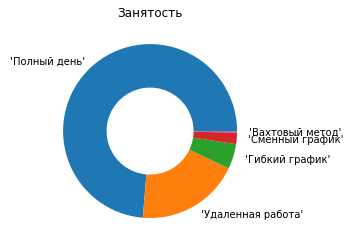

In [60]:
plt.pie(
    df.schedule_name.value_counts().values,
    labels=df.schedule_name.value_counts().index,
    wedgeprops=dict(width=0.5) # для бублика
    )
plt.title('Занятость')
plt.show

In [91]:
df.schedule_name.value_counts()

 'Полный день'         39919
 'Удаленная работа'    10455
 'Гибкий график'        2519
 'Сменный график'       1159
 'Вахтовый метод'        140
Name: schedule_name, dtype: int64

создаем функцию для разделения на 2 категории: 1) полный день 2) все остальное

In [99]:
def fulltime(text):
    if text.find('Полный день') == -1:
        return 0
    else:
        return 1

In [100]:
df['full_time'] = df.schedule_name.apply(fulltime)

In [79]:
df.full_time.value_counts()

1    39919
0    14273
Name: full_time, dtype: int64

### Создадим dataframe sft ('salary_full_time') для анализа зарплаты и занятости

убираем строки без данных о зарплате

In [101]:
sft = df[df.salary_from_ru != 0]

In [102]:
sft = sft[['salary_from_ru', 'band_salary', 'salary_category','full_time']]

In [103]:
sft

,salary_from_ru,band_salary,salary_category,full_time
0,"100,000.00",от 100 т.р.,4,1
1,"100,000.00",от 100 т.р.,4,1
2,"100,000.00",от 100 т.р.,4,1
3,"100,000.00",от 100 т.р.,4,1
4,"100,000.00",от 100 т.р.,4,1
...,...,...,...,...
54183,"33,000.00",до 60 т.р.,1,1
54184,"33,000.00",до 60 т.р.,1,1
54185,"33,000.00",до 60 т.р.,1,1
54186,"33,000.00",до 60 т.р.,1,1


In [105]:
sft_1 = sft[sft.full_time == 1]

In [106]:
sft_1.salary_from_ru.describe()

count    39,915.00
mean     70,368.51
std      23,248.69
min      20,500.00
25%      50,000.00
50%      60,000.00
75%     100,000.00
max     100,000.00
Name: salary_from_ru, dtype: float64

In [107]:
sft_0 = sft[sft.full_time == 0]

In [108]:
sft_0.salary_from_ru.describe()

count    14,273.00
mean     68,176.52
std      22,952.81
min      20,500.00
25%      50,000.00
50%      60,000.00
75%     100,000.00
max     100,000.00
Name: salary_from_ru, dtype: float64

In [103]:
from scipy.stats import t
from numpy import sqrt

mean_0, mean_1 = 68176.52, 70368.51
sd_0, sd_1 = 22952.81, 23248.69
N = 14000

se = sqrt((sd_0 ** 2)/N + (sd_1 ** 2)/N)
t_value = (mean_0 - mean_1)/se

p = t.sf(t_value, N-2)
print(f'p={p}')
if p >= 0.05:
    print('Мы НЕ можем отклонить нулевую гипотезу')
else:
    print('Мы можем отклонить нулевую гипотезу')

p=0.9999999999999989
Мы НЕ можем отклонить нулевую гипотезу


### Cделаем копию dataframe

In [104]:
t = df.copy()

### ✂ Почистим dataframe от служебных столбцов

In [80]:
df.columns.tolist()

['id',
 'name',
 'salary',
 'schedule',
 'experience',
 'key_skills',
 'specializations',
 'region',
 'specializations_jsn',
 'profarea_id',
 'profarea_id_1',
 'salary_currency',
 'salary_from',
 'salary_temp',
 'salary_from_ru',
 'band_salary',
 'salary_category',
 'specializations_name',
 'key_skills_jsn',
 'key_skills_name',
 'experience_name',
 'schedule_name',
 'full_time']

In [108]:
df.head(1)

,id,name,salary,schedule,experience,key_skills,specializations,region,specializations_jsn,profarea_id,...,salary_from,salary_temp,salary_from_ru,band_salary,salary_category,specializations_name,key_skills_jsn,key_skills_name,experience_name,schedule_name
0,50632962,Консультант по информационной безопасности,NaN,"{'id': 'fullDay', 'name': 'Полный день'}","{'id': 'between1And3', 'name': 'От 1 года до 3...","[{'name': 'Информационная безопасность'}, {'na...","[{'id': '1.110', 'name': 'Компьютерная безопас...",Москва,"[{""id"": ""1.110"", ""name"": ""Компьютерная безопас...","[1, 1]",...,NaN,"100,000.00","100,000.00",от 100 т.р.,4,"[Компьютерная безопасность, Консалтинг, Аутсор...","[{""name"": ""Информационная безопасность""}, {""na...","[Информационная безопасность, Аудит информацио...",'От 1 года до 3 лет','Полный день'


In [109]:
df.drop(
    ['salary',
    'schedule',
    'experience',
    'key_skills',
    'specializations',
    'specializations_jsn',
    'profarea_id',
    'profarea_id_1',
    'salary_currency',
    'salary_from',
    'salary_temp',
    'key_skills_jsn',
    ],
    axis=1,
    inplace=True)

In [111]:
df.head(2)

,id,name,region,salary_from_ru,band_salary,salary_category,specializations_name,key_skills_name,experience_name,schedule_name,full_time
0,50632962,Консультант по информационной безопасности,Москва,"100,000.00",от 100 т.р.,4,"[Компьютерная безопасность, Консалтинг, Аутсор...","[Информационная безопасность, Аудит информацио...",'От 1 года до 3 лет','Полный день',1
1,49062175,Product Manager (Разработка ПО в сфере Информа...,Москва,"100,000.00",от 100 т.р.,4,"[Компьютерная безопасность, Развитие бизнеса, ...","[Информационная безопасность, Запуск новых про...",'От 3 до 6 лет','Полный день',1


#### Описательная статистика

In [113]:
# Описательная статистика для числовых столбцов датасета
df.salary_from_ru.describe().reset_index()

,index,salary_from_ru
0,count,"54,192.00"
1,mean,"69,785.99"
2,std,"23,197.91"
3,min,0.00
4,25%,"50,000.00"
5,50%,"60,000.00"
6,75%,"100,000.00"
7,max,"100,000.00"


In [114]:
# Описательная статистика для нечисловых столбцов датасета
df.describe(include=['object', 'bool'])

,name,region,band_salary,specializations_name,key_skills_name,experience_name,schedule_name
count,54192,54192,54192,54192,54192,54192,54192
unique,26016,84,5,811,34424,4,5
top,Системный администратор,Москва,до 60 т.р.,"[Программирование, Разработка, Системы управле...",нет информации,'От 1 года до 3 лет','Полный день'
freq,1652,16605,21981,14268,11899,27988,39919


In [104]:
df.head(3)

,id,name,region,salary_from_ru,band_salary,salary_category,specializations_name,key_skills_name,experience_name,schedule_name,full_time
0,50632962,Консультант по информационной безопасности,Москва,100000.0,от 100 т.р.,4,"[Компьютерная безопасность, Консалтинг, Аутсор...","[Информационная безопасность, Аудит информацио...",'От 1 года до 3 лет','Полный день',1
1,49062175,Product Manager (Разработка ПО в сфере Информа...,Москва,100000.0,от 100 т.р.,4,"[Компьютерная безопасность, Развитие бизнеса, ...","[Информационная безопасность, Запуск новых про...",'От 3 до 6 лет','Полный день',1
2,46199125,Эксперт по компьютерной криминалистике,Москва,100000.0,от 100 т.р.,4,"[Компьютерная безопасность, Аналитик, Экономич...","[Английский язык, Информационная безопасность,...",'От 3 до 6 лет','Полный день',1
